In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

In [2]:
image = mpimg.imread('fig.png')
# make image smaller (faster execution) and change format from [0,1] to [0,255]
image = (image[::4,::3] * 255).astype(int)

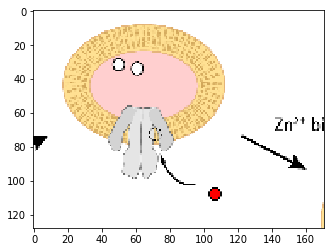

In [3]:
plt.imshow(image)
plt.show()

In [4]:
def initialize_kernels(n,k=3,c=3):
    '''
    Initialize kernels with weights and bias
        n - number of kernels/filters
        k - the size of the kernel (in pixels, square)
        c - the depth (channels)
    '''
    std = 1/np.sqrt(np.prod((n,k,k,c)))
    return np.random.normal(scale=std,size=(n,k,k,c))

def convolve(data,kernels):
    '''
    Performs convolution using the given kernels and return the resulting image (summed over all kernels)
        no padding
    '''
    # get parameters
    n,k,_,ch = kernels.shape
    x,y,_ = data.shape
    # create new image array
    convolved = np.zeros([x-k+1,y-k+1,ch])
    # skip on edges (left and right)
    s_l = k//2
    s_r = k-s_l-1
    # apply convolution
    for c in range(ch):
        # for each channel (color)
        for i in range(s_l,x-s_r):
            for j in range(s_l,y-s_r):
                # sum over all kernels
                convolved[i-s_l,j-s_l,c] = (data[i-s_l:i+s_r+1,j-s_l:j+s_r+1,c] * kernels[:,:,:,c]).sum()  
    return convolved

def ReLU(data):
    '''Apply ReLU on the data'''
    return np.maximum(data,0)

def max_pool(data,step_size):
    '''Max pool data and reduce the number of pixels'''
    # setup parameters
    x,y,ch = data.shape
    skip = step_size//2
    # generate output array
    pool = np.zeros((x-skip,y-skip,ch))
    # reduce size
    for c in range(ch):
        # do not pool channel (color)
        for i in range(skip,x):
            for j in range(skip,y):
                pool[i-skip,j-skip,c] = np.max(data[i-skip:i+skip+1,j-skip:j+skip+1,c])
    return pool

In [5]:
kernels = initialize_kernels(1,3) # fix even numbers
output = convolve(image,kernels)
output = ReLU(output)
pool = max_pool(output,2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


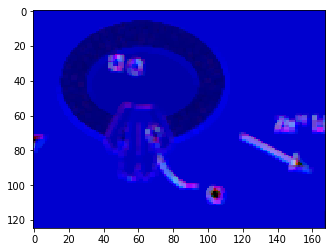

In [6]:
plt.imshow(pool.astype(int))
plt.show()

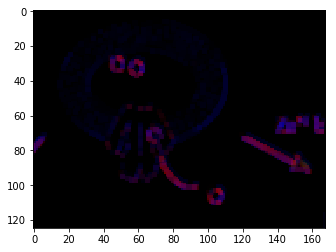

In [7]:
kernels = initialize_kernels(1,3) # fix even numbers
output = convolve(image,kernels)
output = ReLU(output)
pool = max_pool(output,2)
plt.imshow(pool.astype(int))
plt.show()

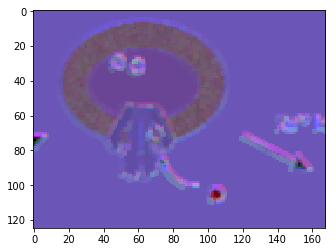

In [9]:
kernels = initialize_kernels(1,3) # fix even numbers
output = convolve(image,kernels)
output = ReLU(output)
pool = max_pool(output,2)
plt.imshow(pool.astype(int))
plt.show()